# Chapter 15- Correlation and Regression


In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Housing file California 
original = Table.read_table('housing.csv')
original

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY
-122.25,37.84,52,2535,489,1094,514,3.6591,299200,NEAR BAY
-122.25,37.84,52,3104,687,1157,647,3.12,241400,NEAR BAY
-122.26,37.84,42,2555,665,1206,595,2.0804,226700,NEAR BAY
-122.25,37.84,52,3549,707,1551,714,3.6912,261100,NEAR BAY


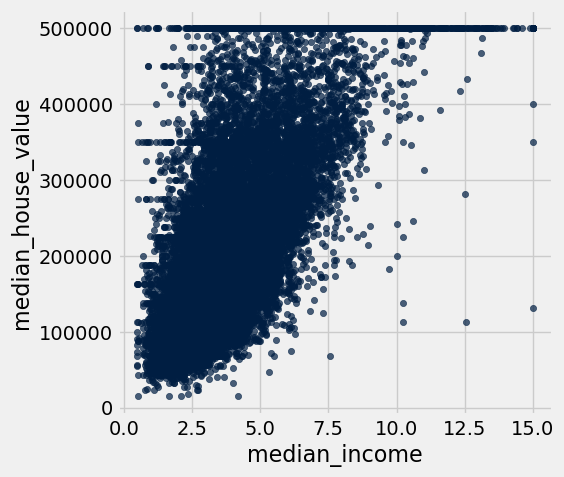

In [3]:
original.scatter('median_income', 'median_house_value')

# Maximum Value on Median Housing Value
Notice there is a limit of 500,000 dollars on the properties listed.  Since some properties maybe more than 500,000 dollars.  Therefore, we will get rid of values of $500,000 or more.

In [4]:
housing = original.where('median_house_value', are.below(500000))

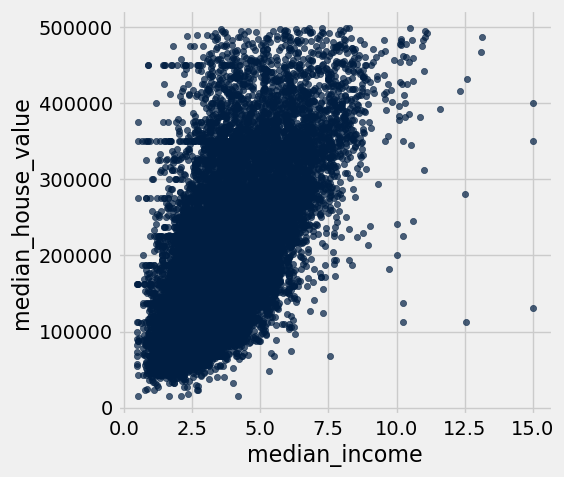

In [5]:
housing.scatter('median_income', 'median_house_value')

The prediction at a given midparent height lies roughly at the center of the vertical strip of points at the given height. This method of prediction is called regression. 

# Correlation
We will develop a measure of how tightly clustered a scatter diagram is about a straight line. Formally, this is called measuring linear association.

In [6]:
# previously defined
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

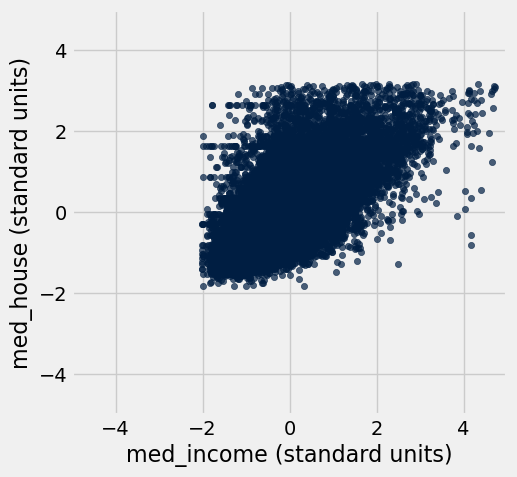

In [7]:
Table().with_columns(
    'med_income (standard units)',  standard_units(housing.column('median_income')), 
    'med_house (standard units)', standard_units(housing.column('median_house_value'))
).scatter(0, 1)
plots.xlim(-5, 5)
plots.ylim(-5, 5);

# The Correlation Coefficient
- The correlation coefficient r is a number between -1 and 1.
- r measures the extent to which the scatter plot clusters around a straight line.
- r=1 if the scatter diagram is a perfect straight line sloping upwards, and r = -1 if the scatter diagram is a perfect straight line sloping downwards.




In [9]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

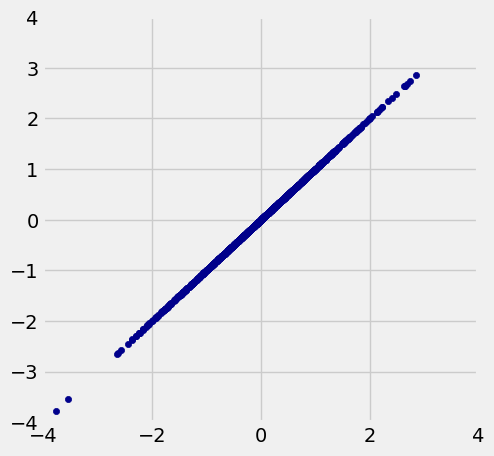

In [10]:
r_scatter(1)

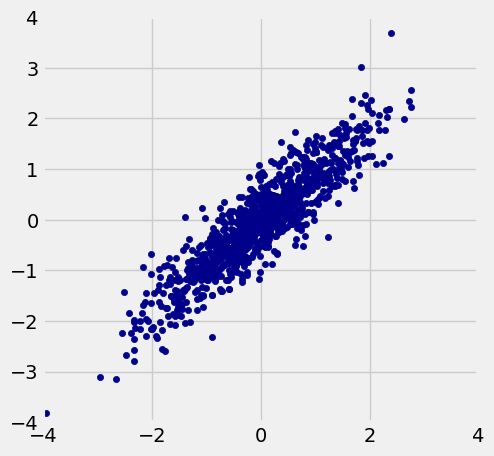

In [11]:
r_scatter(.90)

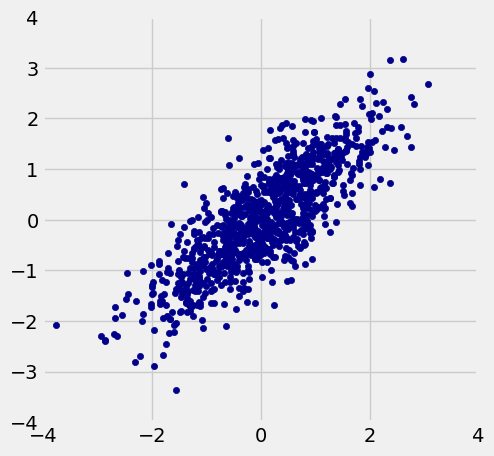

In [12]:
r_scatter(.8)

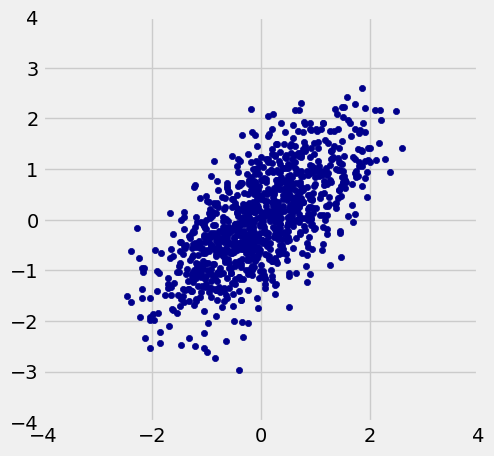

In [13]:
r_scatter(.7)

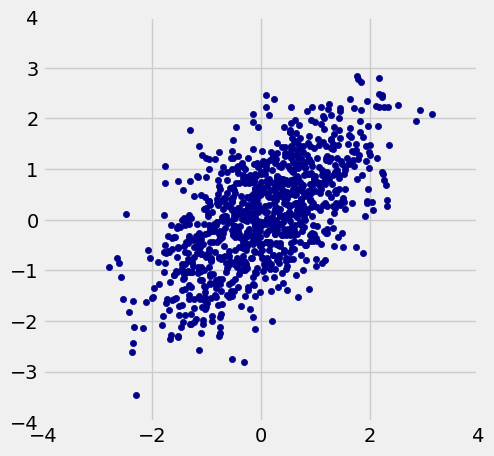

In [14]:
r_scatter(.6)

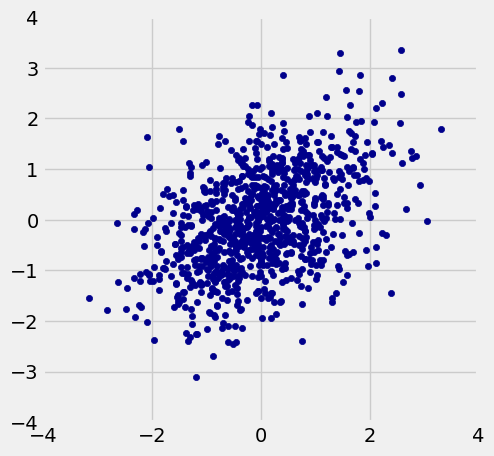

In [15]:
r_scatter(.5)

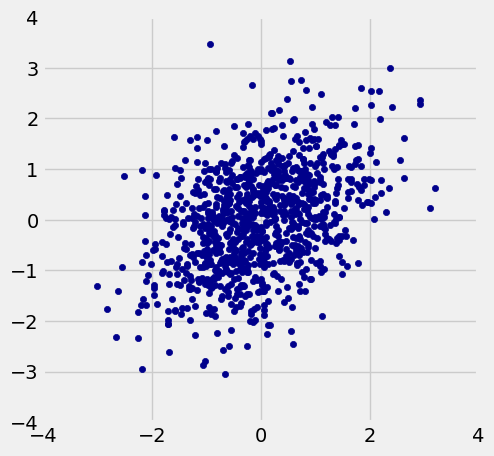

In [16]:
r_scatter(.4)

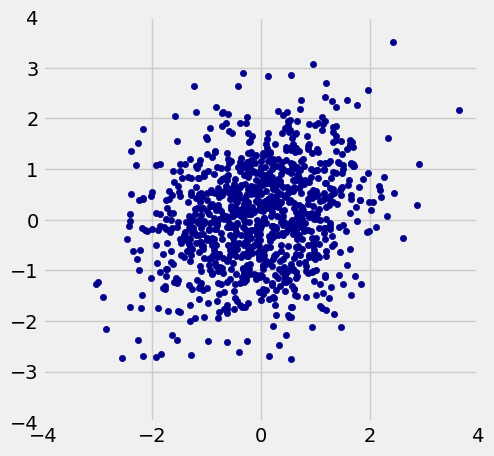

In [17]:
r_scatter(.3)

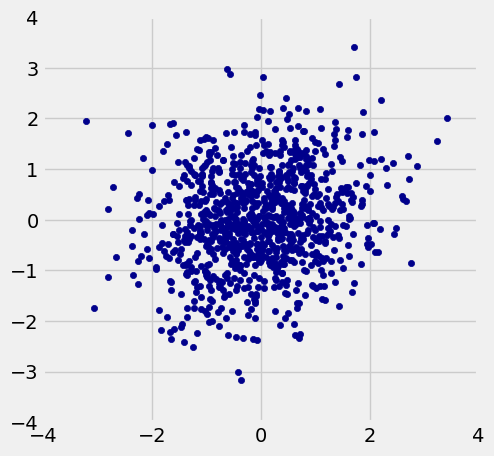

In [18]:
r_scatter(.2)

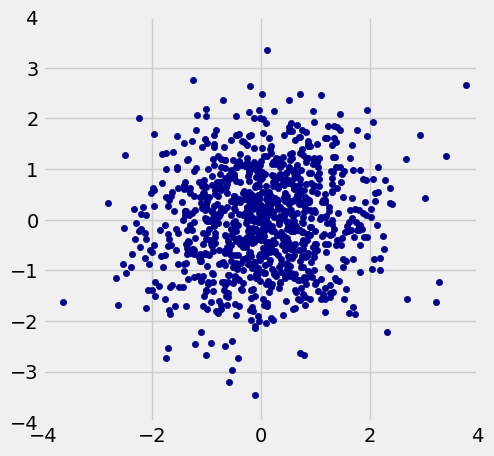

In [19]:
r_scatter(.1)

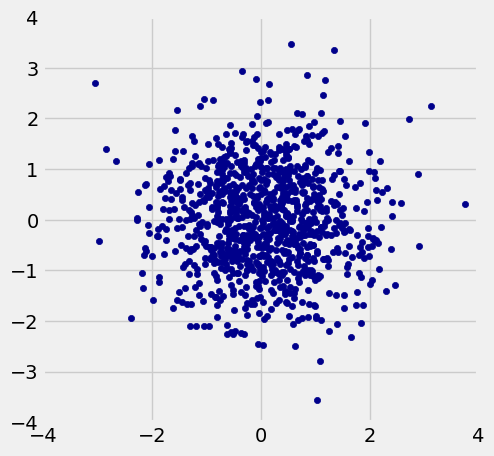

In [20]:
r_scatter(0)

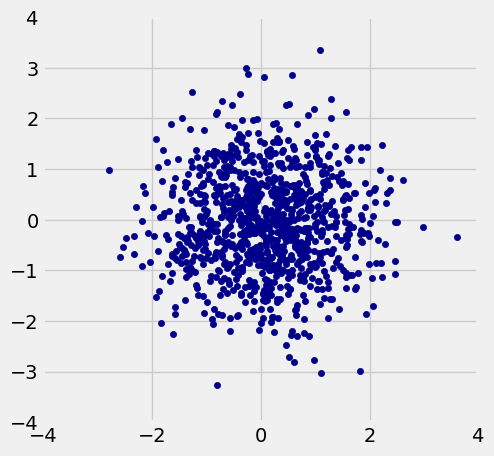

In [21]:
r_scatter(-0.1)

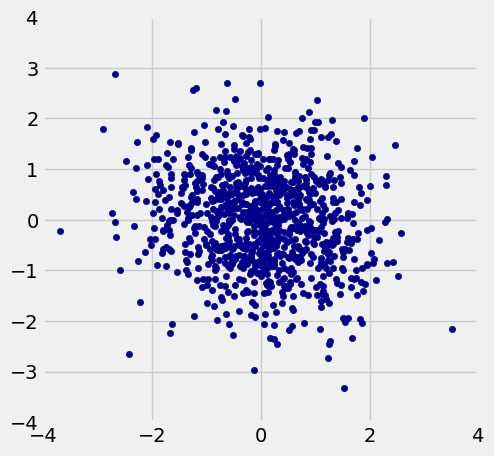

In [22]:
r_scatter(-0.2)

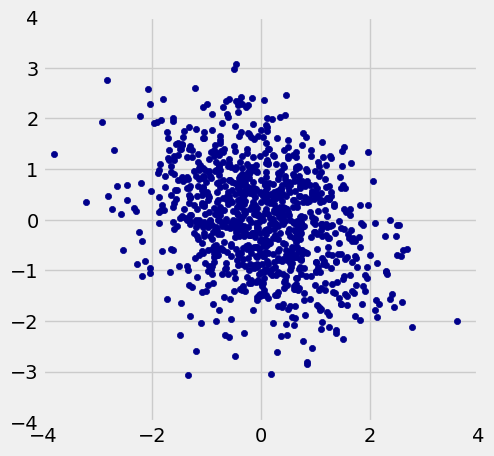

In [23]:
r_scatter(-0.3)

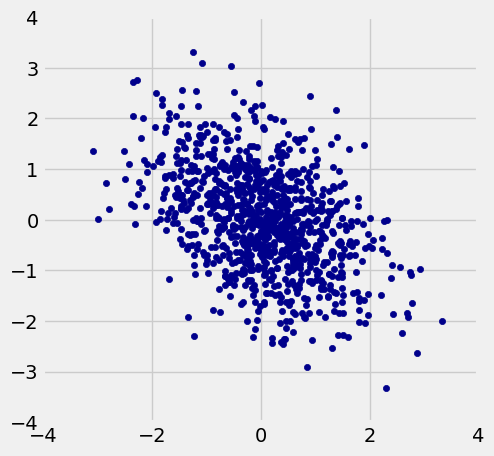

In [24]:
r_scatter(-0.4)

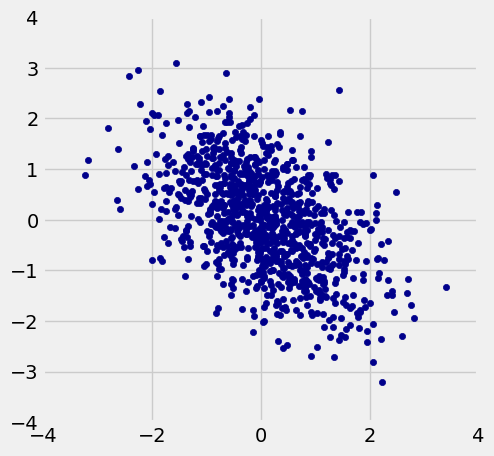

In [25]:
r_scatter(-0.5)

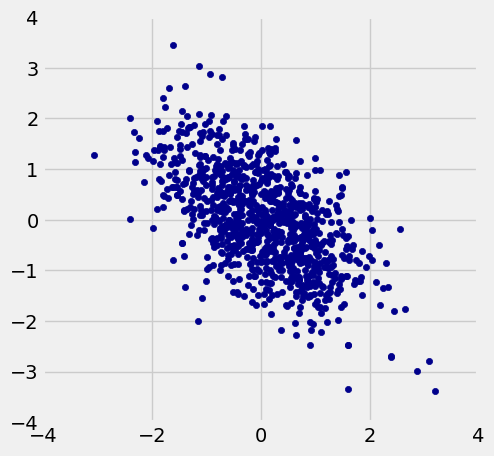

In [26]:
r_scatter(-0.6)

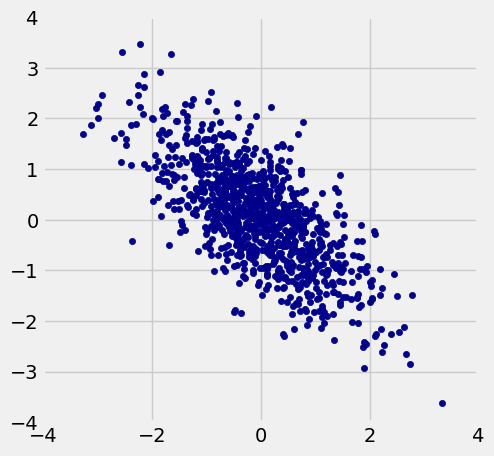

In [27]:
r_scatter(-0.7)

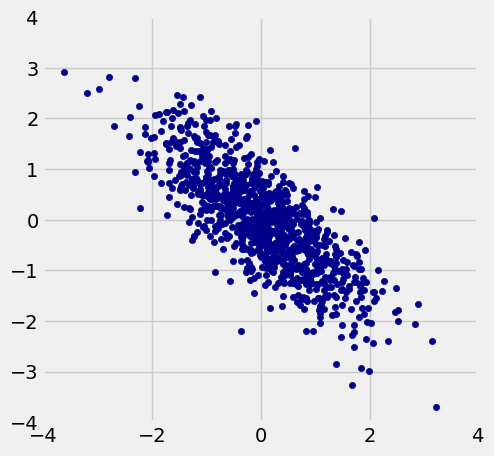

In [28]:
r_scatter(-0.8)

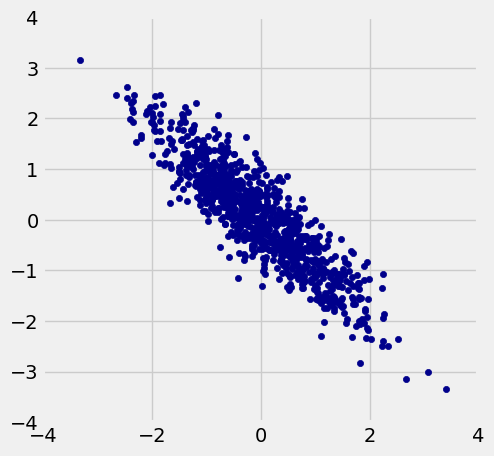

In [29]:
r_scatter(-0.9)

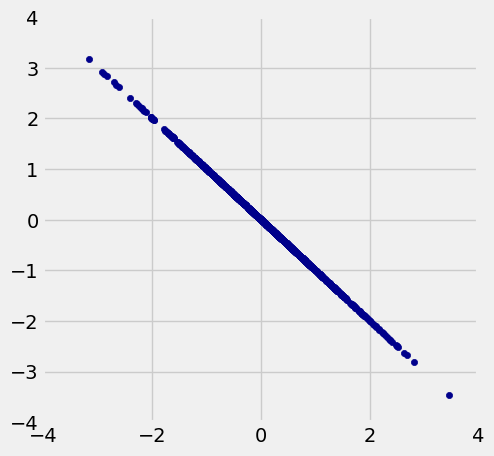

In [30]:
r_scatter(-1)

In [31]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
    'x', x,
    'y', y)
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


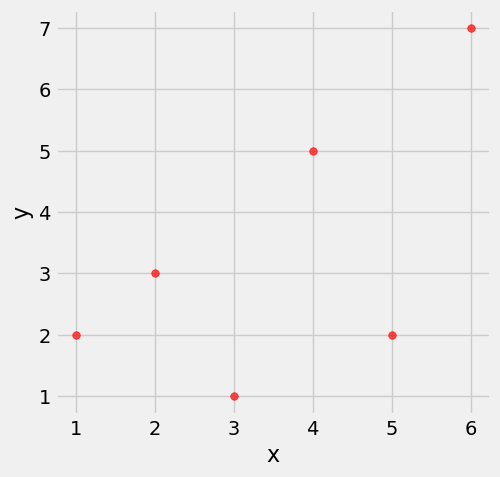

In [32]:
t.scatter(0, 1, s=30, color='red')

# Step 1: Convert each variable to standard units

In [34]:
t_su = t.with_columns(
    'x (standard units)', standard_units(x),
    'y (standard units)', standard_units(y))
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


# Step 2: Multiply each pair of standard units

In [35]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


# Step 3: r is the average of the products computed in Step 2.

In [36]:
# Step 3 r is the average of the products of standard units
# r is the average of the products of standard units

r = np.mean(t_product.column(4))
r

0.61741639718977093

# Properties of r
- r is a pure number.  It has no units. This is because r is based on standard units.
- r is unaffected by changing the units on either axis.  This too is because r is based on standard units.
- r is unaffected by switching the axes.  


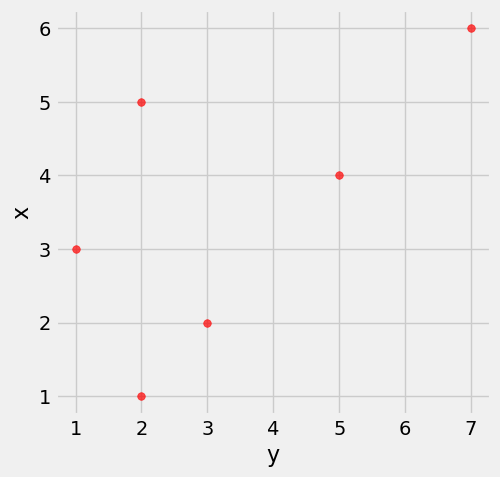

In [37]:
t.scatter('y', 'x', s=30, color='red')

# The correlation Function
Let’s define a function correlation that takes a table and the labels of two columns in the table

# Association is not Causation
Correlation only measures association. Correlation does not imply causation.  Though the correlation between the weight and the math ability of children in a school district may be positive, that does not mean that doing math makes children heavier or that putting on weight improves the children’s math skills.  Age is a confounding variable: older children are both heavier and better at math than younger children, on average.

In [38]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [39]:
correlation(t, 'x', 'y')

0.61741639718977093

In [40]:
correlation(t, 'y', 'x')

0.61741639718977093

In [41]:
correlation(housing, 'median_income', 'median_house_value')

0.6467194263256405

In [42]:
correlation(housing, 'median_house_value', 'median_income')

0.6467194263256405

# Regression Line
When we have a correlation that is large enough, we can predict the median house value from the median income.  A line has the form y = ax + b.  The a is the slope and b is the intercept.  Using the median_income and median_house_value.

In [43]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b
    

In [44]:
pred_median_house_value = fit(housing, 'median_income', 'median_house_value')


In [45]:
housing = housing.with_columns('pred_median_value', pred_median_house_value)
housing

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pred_median_value
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,377946
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,376994
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,335248
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,270697
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,198845
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY,206466
-122.25,37.84,52,2535,489,1094,514,3.6591,299200,NEAR BAY,191363
-122.25,37.84,52,3104,687,1157,647,3.12,241400,NEAR BAY,169806
-122.26,37.84,42,2555,665,1206,595,2.0804,226700,NEAR BAY,128236
-122.25,37.84,52,3549,707,1551,714,3.6912,261100,NEAR BAY,192647


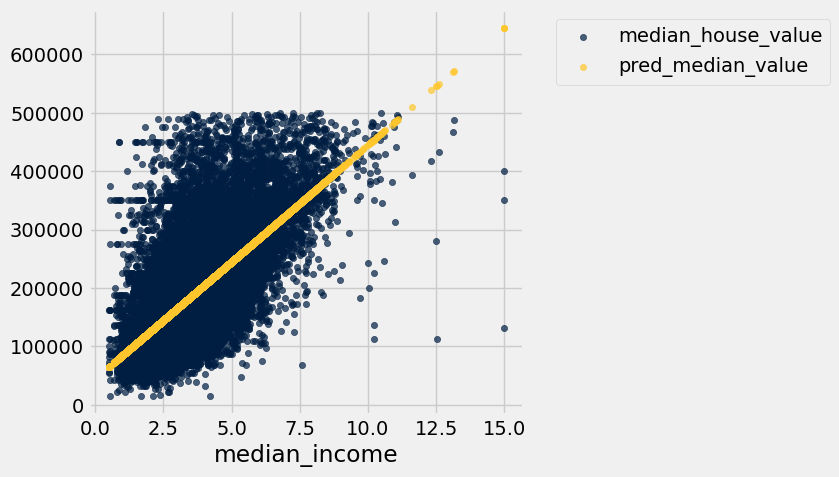

In [46]:
housing.select('median_income', 'median_house_value', 'pred_median_value').scatter('median_income')

# Non Linear Association
What if the relationship between two variables is nonlinear.

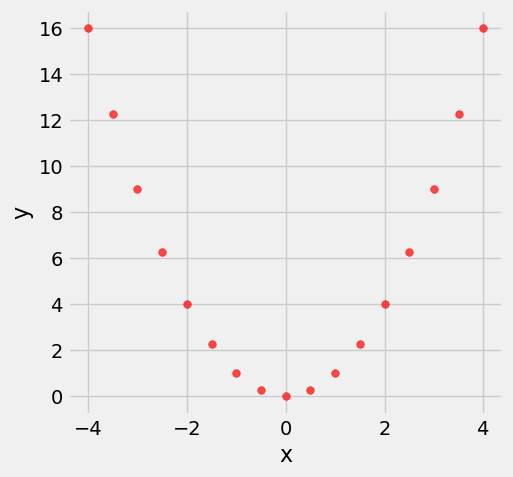

In [47]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [48]:
correlation(nonlinear, 'x', 'y')

0.0

# Non-Linear relationships have a correlation of zero.

# Correlation is Affected by Outliers

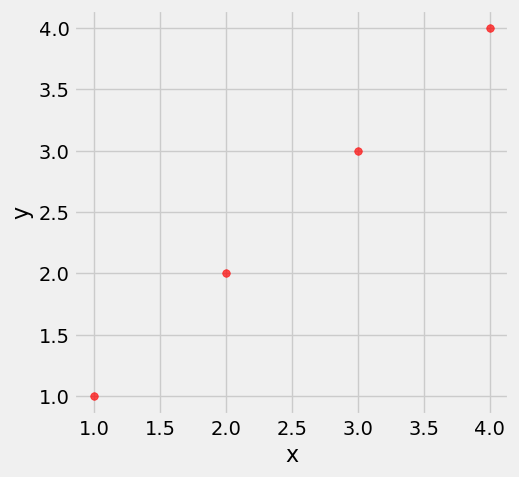

In [49]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [50]:
correlation(line, 'x', 'y')

1.0

# Outlier at x = 5  (5, 0)

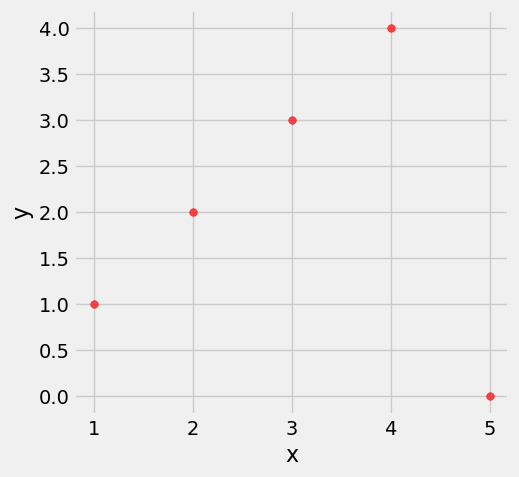

In [51]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [52]:
correlation(outlier, 'x', 'y')

0.0

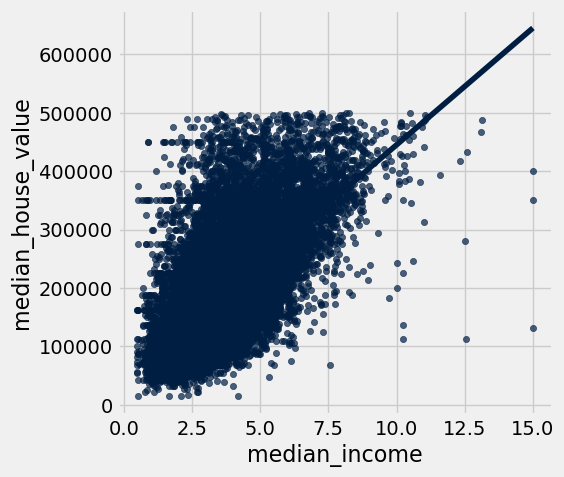

In [53]:
housing.select('median_income', 'median_house_value').scatter('median_income', 'median_house_value',  fit_line=True)

In [54]:
kc_house = Table.read_table('kc_house_data.csv')
kc_house

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1.225e+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850,3,1.5,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
3793500160,20150312T000000,323000,3,2.5,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


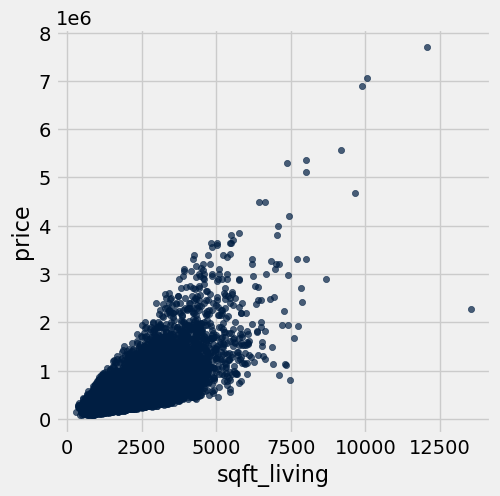

In [55]:
# Compute the Correlation Coefficent 
kc_house.scatter('sqft_living', 'price')

In [56]:
correlation(kc_house, 'sqft_living', 'price')

0.70203505461180016

In [57]:
correlation(kc_house, 'price','sqft_living')

0.70203505461180016

In [58]:
# Slope, intercept, and fitted value

kc_fit = fit(kc_house, 'sqft_living', 'price')
kc_house = kc_house.with_column('fitted', kc_fit)
kc_house.select('price', 'fitted')

price,fitted
221900,287555
538000,677622
180000,172499
604000,506441
510000,427867
1.225e+06,1.4774e+06
257500,437689
291850,253880
229500,455929
323000,486798


In [59]:
# slope and intercept
kc_slope = slope(kc_house, 'sqft_living', 'price')
kc_intercept = intercept(kc_house, 'sqft_living', 'price')


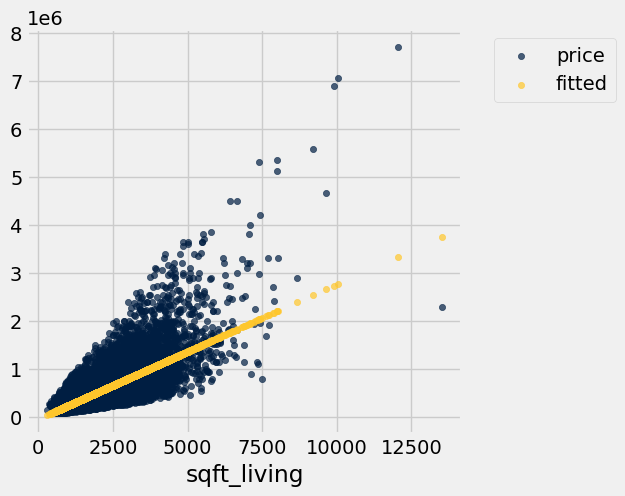

In [60]:
kc_house.select('sqft_living','price', 'fitted').scatter('sqft_living')

In [62]:
kc_slope = slope(kc_house, 'sqft_living', 'price')
kc_intercept = intercept(kc_house, 'sqft_living', 'price')
kc_slope, kc_intercept

(280.62356789744831, -43580.743094474077)

In [64]:
kc_house = kc_house.with_columns('Std Sqft_living', standard_units(kc_house.column('sqft_living')), 
                                 'Std Price', standard_units(kc_house.column('price')) )


In [65]:
predicted = fit(kc_house, 'Std Sqft_living', 'Std Price')
actual = kc_house.column('Std Price')
errors = actual - predicted
errors


array([-0.1788388 , -0.38031793,  0.02043098, ...,  0.43431648,
       -0.01475535,  0.22429994])

In [66]:
kc_house = kc_house.with_columns('Errors', errors
                                )
kc_house

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fitted,Std Sqft_living,Std Price,Errors
7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,287555,-0.979835,-0.866717,-0.178839
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,677622,0.533634,-0.00568792,-0.380318
5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,172499,-1.42625,-0.980849,0.020431
2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,506441,-0.13055,0.17409,0.265741
1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,427867,-0.435422,-0.0819575,0.223724
7237550310,20140512T000000,1.225e+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1.4774e+06,3.63679,1.86564,-0.687513
1321400060,20140627T000000,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,437689,-0.397313,-0.769746,-0.490819
2008000270,20150115T000000,291850,3,1.5,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,253880,-1.11049,-0.67618,0.103426
2414600126,20150415T000000,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,455929,-0.326539,-0.846016,-0.616774
3793500160,20150312T000000,323000,3,2.5,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,486798,-0.206768,-0.59133,-0.446171


In [67]:
kc_slope_std = slope(kc_house, 'Std Sqft_living', 'Std Price')
kc_intercept_std = intercept(kc_house, 'Std Sqft_living', 'Std Price')
kc_slope_std, kc_intercept_std


(0.70203505461180027, -2.0668887008578361e-16)

In [68]:
def rmse(tbl, x,  y, slope, intercept):
    x = tbl.column(x)
    y = tbl.column(y)
    fitted = slope * x + intercept
    mse = np.mean((y - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)
    

In [69]:
rmse(kc_house, 'Std Sqft_living', 'Std Price', kc_slope_std, kc_intercept_std )


Root mean squared error: 0.71214238892


In [70]:
np.sqrt(np.mean(kc_house.column('Errors')**2))

0.71214238891966475